## Create Fake DataFrame for Analysis

In [1]:
import pandas as pd
import numpy as np

higher bitrate means higher quality of the audio.

- 32 kbit/s – generally acceptable only for speech.
- 96 kbit/s – generally used for speech or low-quality streaming.
- 128 or 160 kbit/s – mid-range bitrate quality.
- 192 kbit/s – medium quality bitrate.

The sample rate determines how many samples per second a digital audio system uses to record the audio signal. The higher the sample rate, the higher frequencies a system can record.

- 44.1 kHz
- 48 kHz
- 96 kHz

I would assume bitrate has a higher correlation with accuracy while sample rate might not.

In [2]:
# initialize list of lists
# bitrate; sample_rate; accuracy
data = [[128000, 44100, 0.8675], [192000, 44100, 0.9185], [160000, 44100, 0.8975],
        [32000, 44100, 0.6750], [32000, 48000, 0.6857], [96000, 44100, 0.7575],
        [128000, 48000, 0.8275], [192000, 48000, 0.9005], [160000, 48000, 0.9075]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Bitrate', 'SampleRate', 'Accuracy'], index = np.arange(1,10))
  
# print dataframe.
df

,Bitrate,SampleRate,Accuracy
1,128000,44100,0.8675
2,192000,44100,0.9185
3,160000,44100,0.8975
4,32000,44100,0.6750
5,32000,48000,0.6857
6,96000,44100,0.7575
7,128000,48000,0.8275
8,192000,48000,0.9005
9,160000,48000,0.9075


## What we should do to get such dataframe

simple for loop we should use to create such dataframe:

we would create `bitrate`, `samplerate`, `accuracy` as three empty list at first

In [3]:
bitrate = []
samplerate = []
accuracy = []

use for loop to append new data in each list

In [4]:
# for ...
bitrate.append(1200)
bitrate.append(1300)
bitrate.append(1400)
bitrate

[1200, 1300, 1400]

In [5]:
# for ...
samplerate = [30, 40, 50]
accuracy = [0.9, 0.8, 0.9]
print(samplerate)
print(accuracy)

[30, 40, 50]
[0.9, 0.8, 0.9]


combine the three lists together

In [6]:
columns = [bitrate,samplerate,accuracy]
columns

[[1200, 1300, 1400], [30, 40, 50], [0.9, 0.8, 0.9]]

need to transpost the df first

In [7]:
df_test = pd.DataFrame(columns).transpose()
df_test.columns = ['bitrate','samplerate','accuracy']
df_test

,bitrate,samplerate,accuracy
0,1200.0,30.0,0.9
1,1300.0,40.0,0.8
2,1400.0,50.0,0.9


## Regression Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation plot

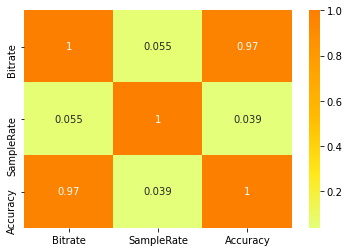

In [9]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

### Linear Regression

Our hypothesis function would look like this:

$$ h_\theta(x_i) = \theta_0 + \theta_1 Bitrate + \theta_2 SampleRate$$

In [10]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

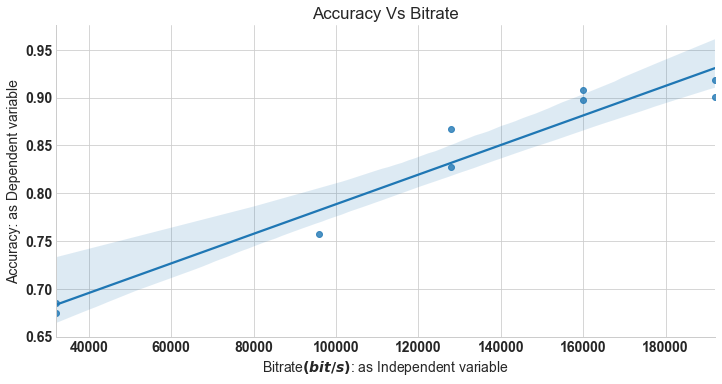

In [11]:
sns.lmplot(x='Bitrate',y='Accuracy',data=df,aspect=2,height=5)
plt.xlabel('Bitrate$(bit/s)$: as Independent variable')
plt.ylabel('Accuracy: as Dependent variable')
plt.title('Accuracy Vs Bitrate');

### Categorical Data - Boxplot & Violinplot

instead of getting a continuous number as independent variable, we might end up getting discrete values. Therefore, we can create new column that classify different Bitrate.

In [12]:
df_new = df.copy()
df_new 

,Bitrate,SampleRate,Accuracy
1,128000,44100,0.8675
2,192000,44100,0.9185
3,160000,44100,0.8975
4,32000,44100,0.6750
5,32000,48000,0.6857
6,96000,44100,0.7575
7,128000,48000,0.8275
8,192000,48000,0.9005
9,160000,48000,0.9075


In [13]:
# create a list of our conditions
conditions = [
    (df_new['Bitrate'] == 192000),
    (df_new['Bitrate'] == 160000),
    (df_new['Bitrate'] == 128000),
    (df_new['Bitrate'] ==  96000),
    (df_new['Bitrate'] ==  32000)
    ]

# create a list of the values we want to assign for each condition
values = ['192 kbit/s', '160 kbit/s', '128 kbit/s', '96 kbit/s', '32 kbit/s']

# create a new column and use np.select to assign values to it using our lists as arguments
df_new['BR_kbit'] = np.select(conditions, values)

# display updated DataFrame
df_new.head()

,Bitrate,SampleRate,Accuracy,BR_kbit
1,128000,44100,0.8675,128 kbit/s
2,192000,44100,0.9185,192 kbit/s
3,160000,44100,0.8975,160 kbit/s
4,32000,44100,0.6750,32 kbit/s
5,32000,48000,0.6857,32 kbit/s


Now we have a new categorical variable called `BR_kbit`. We can draw a boxplot to visualize it:

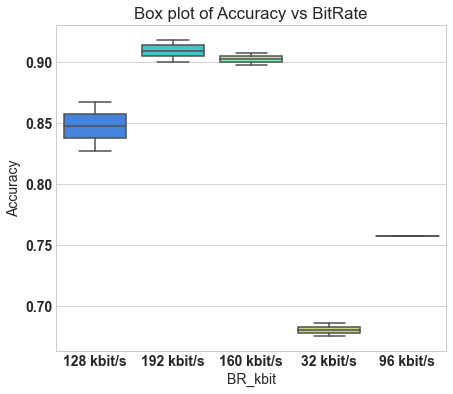

In [14]:
plt.figure(figsize=(7,6))
sns.boxplot(x='BR_kbit', y='Accuracy',data=df_new,palette='rainbow')
plt.title('Box plot of Accuracy vs BitRate');

Now, we can do the same for SampleRate.

In [15]:
sr_conditions = [
    (df_new['SampleRate'] == 44100),
    (df_new['SampleRate'] == 48000)
    ]

sr_values = ['44.1 kbit/s', '48 kbit/s']

df_new['SR_kHz'] = np.select(sr_conditions, sr_values)

df_new.head()

,Bitrate,SampleRate,Accuracy,BR_kbit,SR_kHz
1,128000,44100,0.8675,128 kbit/s,44.1 kbit/s
2,192000,44100,0.9185,192 kbit/s,44.1 kbit/s
3,160000,44100,0.8975,160 kbit/s,44.1 kbit/s
4,32000,44100,0.6750,32 kbit/s,44.1 kbit/s
5,32000,48000,0.6857,32 kbit/s,48 kbit/s


We can still do a boxplot, but I chose violinplot instead.

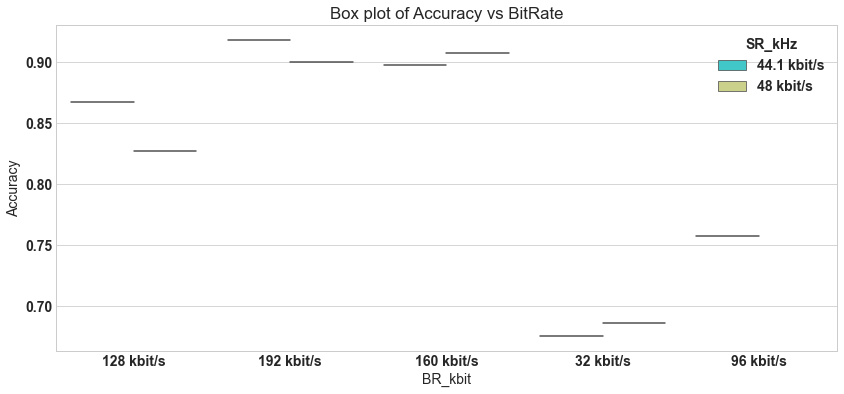

In [16]:
plt.figure(figsize=(14,6))
sns.violinplot(x='BR_kbit', y='Accuracy',hue='SR_kHz',data=df_new,palette='rainbow',split=True)
plt.title('Box plot of Accuracy vs BitRate');

It should looks prettier if we have more data.